# PROBABILITY DISTRIBUTIONS EXERCISES

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

<hr style="border:2px solid gray">

### #1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

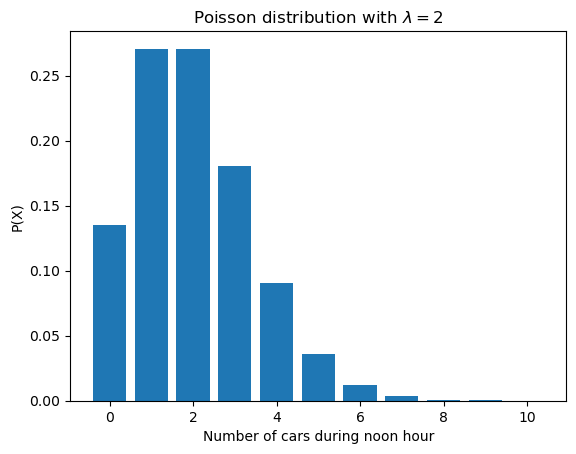

In [94]:
λ = 2

x = np.arange(0,11)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');

<hr style="border:0.5px solid black">

##### What is the probability that no cars drive up in the noon hour?

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
I want to know the probability that exactly zero cars drive up in this noon hour
<br>
<br>
It's a poisson distribution, so I know two things about this:
<br>
a) it's discrete ==> pmf (not pdf)
    <br>
b) it's poisson, so that the noon hour part is already captured by the distrubution
</div>

Text(3, 0.22, '$P(X = 0) = 0.135$')

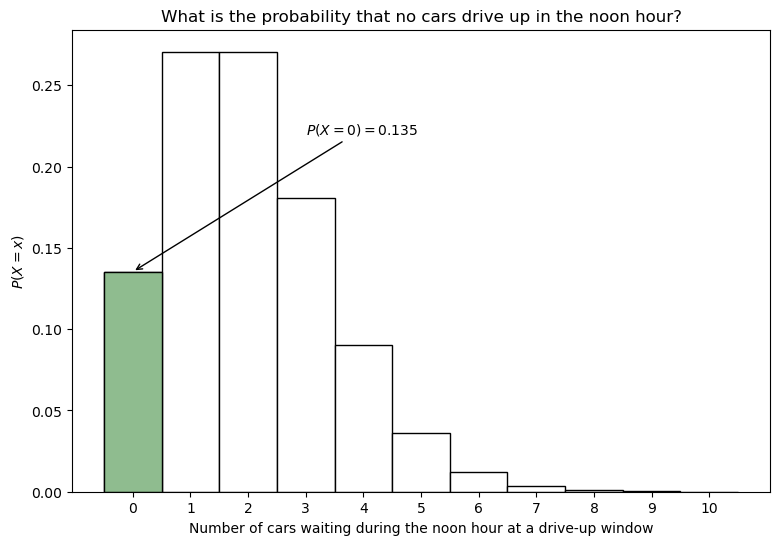

In [95]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0, 
    stats.poisson(λ).pmf(0), 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)
plt.annotate(
    f'$P(X = 0) = {stats.poisson(λ).pmf(0):.3f}$', 
    (0, stats.poisson(2).pmf(0)), 
    xytext=(3, .22), 
    arrowprops={'arrowstyle': '->'}
)

In [96]:
λ = 2 
stats.poisson(λ).pmf(0)

0.1353352832366127

In [97]:
#let's make this clearer by rounding to 2 decimal places
round(stats.poisson(λ).pmf(0), 2)

0.14

<hr style="border:0.5px solid black">

##### What is the probability that 3 or more cars come through the drive through?

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
Looking for probability of X or *more* happening
<br>
This leads me to think that I want a survival function
<br>
<i>Caveat</i>: making sure that im passing the right value in, since sf is exclusive
</div>

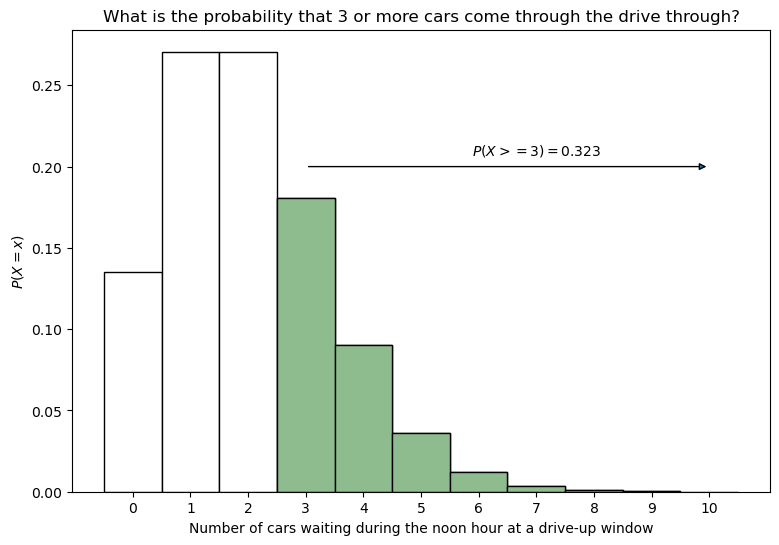

In [98]:
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that 3 or more cars come through the drive through?')

x1 = np.arange(3, 10)
y1 = stats.poisson(λ).pmf(x1)

plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')

plt.annotate('', xy=(3, .20), xytext=(10, .20), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
plt.text(7, .21, f'$P(X >= 3) = {stats.poisson(λ).sf(2):.3f}$', va='center', ha='center')
plt.show()

In [99]:
stats.poisson(λ).sf(2)

0.32332358381693654

<hr style="border:0.5px solid black">

##### How likely is it that the drive through gets at least 1 car?

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
survival function once again here
<br>
same caveat as before
</div>

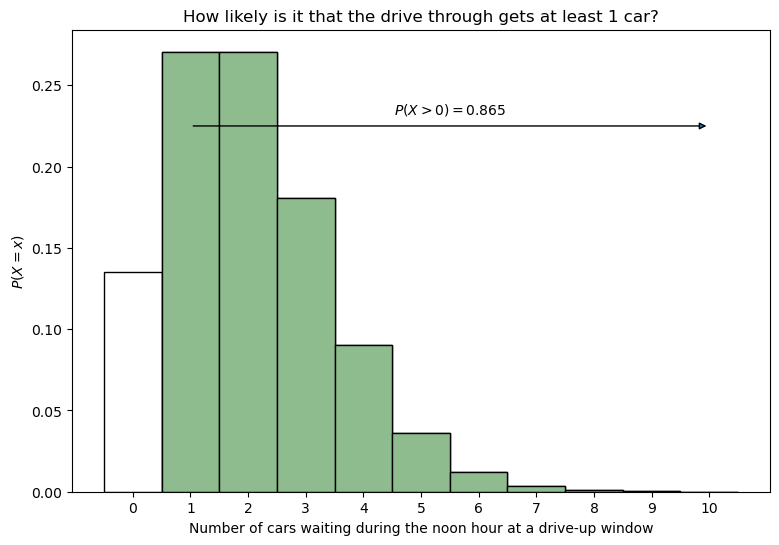

In [100]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('How likely is it that the drive through gets at least 1 car?')

x1 = np.arange(1, 11)
y1 = stats.poisson(λ).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.poisson(λ).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

In [101]:
stats.poisson(λ).sf(0)

0.8646647167633873

<hr style="border:1.5px solid black">

### #2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
I know that I have a normal distribution
<br>
mean is 3.0, std is 0.3
<br>
===> values at the right side of the distribution tail
<br>
I have the P, I want the X! inverse survivial function
</div>

In [102]:
μ = 3.0
σ = 0.3
grade = stats.norm(μ, σ)

<b>Let's visualize this</b>

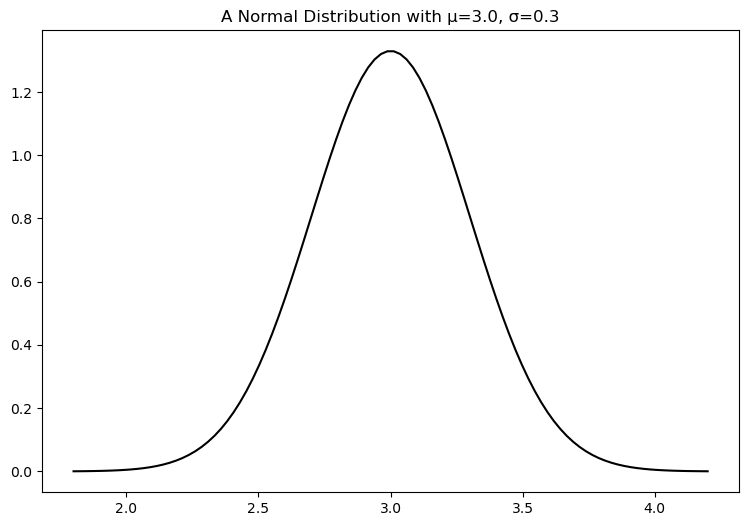

In [103]:
x = np.linspace(μ - 4*σ, μ + 4*σ, 100)
y = grade.pdf(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')
plt.show()

<hr style="border:0.5px solid black">

##### What grade point average is required to be in the top 5% of the graduating class?

In [104]:
grade.isf(.05)

3.4934560880854417

In [105]:
#or the opposite is true as well
grade.ppf(0.95)

3.4934560880854417

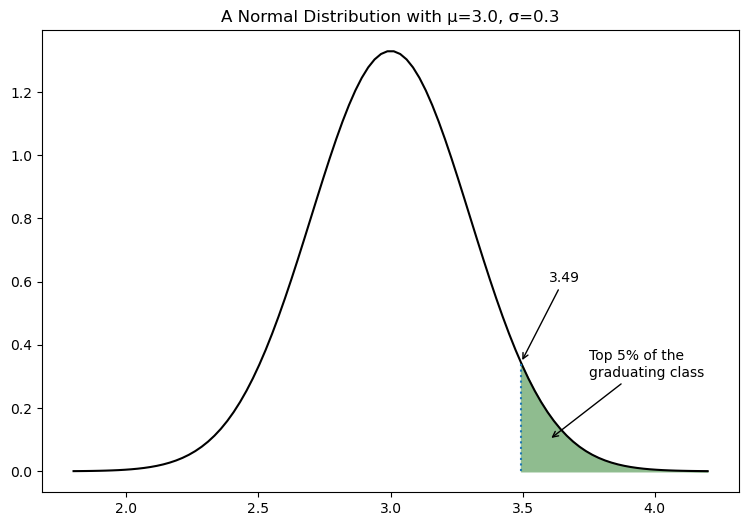

In [106]:
top_5_percent_cutoff = grade.isf(0.05)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(top_5_percent_cutoff, 0, grade.pdf(top_5_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(top_5_percent_cutoff, μ + 4*σ)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{top_5_percent_cutoff:,.2f}', (top_5_percent_cutoff, grade.pdf(top_5_percent_cutoff)),
             xytext=(3.6, .6), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Top 5% of the\ngraduating class', (3.6, .1), xytext=(3.75, .3), arrowprops={'arrowstyle': '->'})

plt.show()

<hr style="border:0.5px solid black">

##### What GPA constitutes the bottom 15% of the class?

In [107]:
grade.ppf(.15)

2.689069983151863

In [108]:
#the opposite is also true
grade.isf(.85)

2.689069983151863

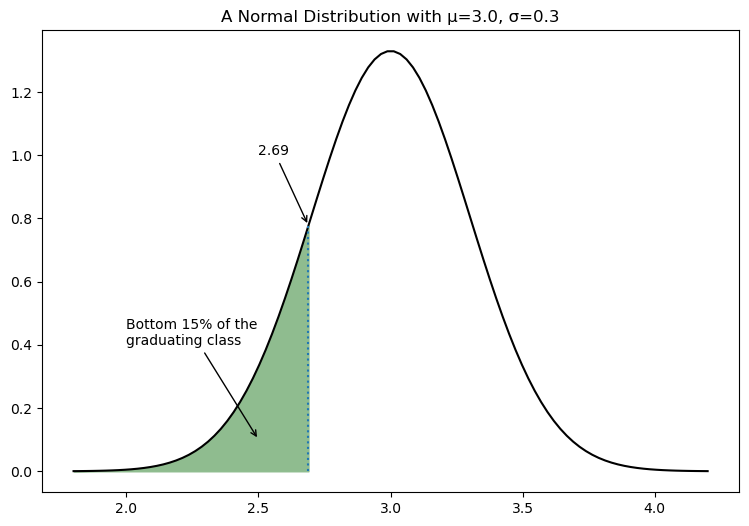

In [109]:
bottom_15_percent_cutoff = grade.ppf(0.15)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(bottom_15_percent_cutoff, 0, grade.pdf(bottom_15_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(μ - 4*σ, bottom_15_percent_cutoff)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{bottom_15_percent_cutoff:,.2f}', (bottom_15_percent_cutoff, grade.pdf(bottom_15_percent_cutoff)),xytext=(2.5, 1.0), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Bottom 15% of the\ngraduating class', (2.5, .1), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

plt.show()

<hr style="border:0.5px solid black">

##### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

<div class="alert alert-block alert-info">
<b>NOTE:</b> 
    <br>
1st decile: 0-10 percentile
     <br>
2nd decile:10-20 percentile
     <br>
3rd decile: 20-30 percentile</div>


<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
we want to know the X value for where the probability sits in *two* places this time
     <br>
ppf ==> give me the X based on the probability
</div>

In [110]:
range_of_gpas= grade.ppf([.20,.30])
range_of_gpas

array([2.74751363, 2.84267985])

In [111]:
#check our work
(range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8)

True

<hr style="border:0.5px solid black">

##### If I have a GPA of 3.5, what percentile am I in?

In [112]:
grade.cdf(3.5)

0.9522096477271853

In [113]:
grade.sf(3.5)

0.0477903522728147

<hr style="border:1.5px solid black">

### #3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs.
- How likely is it that this many people or more click through?

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
What I know about this siutation:
     <br>
I have a rate of success: 2%
    <br>
I have a number of trials: 4326    
</div>

In [114]:
n_trials = 4326
p= .02
click_throughs = stats.binom(n_trials, p)

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
probability of the right tail of the curve following value X, this is a discrete distribution 
<br>
so we want to be mindful of the way that sf functions</div>

In [115]:
click_throughs.sf(96)

0.13975823631416448

<b>Walkthrough using simulation</b>

In [116]:
clicks= np.random.choice([0,1], (10_000, 4326), p = [.98,.02])
clicks

#([0,1] is click or not- true / false)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [117]:
(clicks.sum(axis=1) >96).mean()

0.1417

<b>Walkthrough using poisson approximation</b>

In [118]:
λ = n_trials* p
stats.poisson(λ).sf(96)

0.14211867659283192

<hr style="border:1.5px solid black">

### #4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?


<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
- We have 100 questions
<br>
- For the first question, we only want to know the success of at least one question over the first 60
</div>

<b>Walkthrough using binomial</b>

In [119]:
n_trials = 60
p= 0.01

stats.binom(n_trials, p).sf(0)

0.45284335760923855

<b>Walkthrough using simulation</b>

In [120]:
((np.random.choice([0,1], (10_000, 60), p= [0.99,0.01])).sum(axis = 1)>0).mean()

0.4486

<hr style="border:1.5px solid black">

### #5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
- How likely is it that the break area gets cleaned up each day? 
- How likely is it that it goes two days without getting cleaned up? 
- All week?

In [121]:
#number of students that visit break area
students = round(.9 * 22 * 3)

#probability of success
p= .03

<b>Let's visualize this</b>

Text(0.5, 1.0, 'Messy Breakroom?')

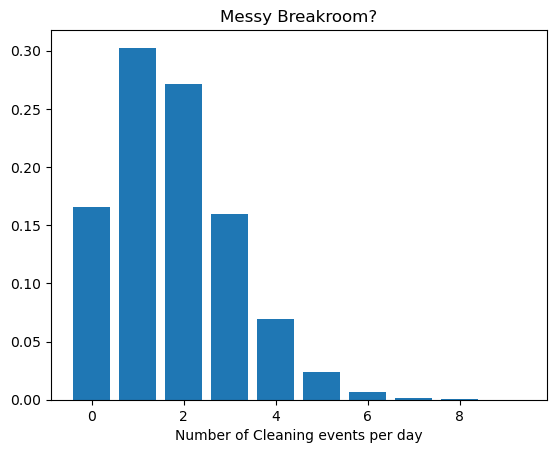

In [122]:
x = np.arange(0,10)
y = stats.binom(students, p).pmf(x)
plt.bar(x,y)
plt.xlabel('Number of Cleaning events per day')
plt.title('Messy Breakroom?')

##### How likely is it that the break area gets cleaned up each day? 


In [123]:
#"sf(0)" because we want it cleaned more then 0 times
clean = stats.binom(students, p)
clean.sf(0)

0.8342199288437352

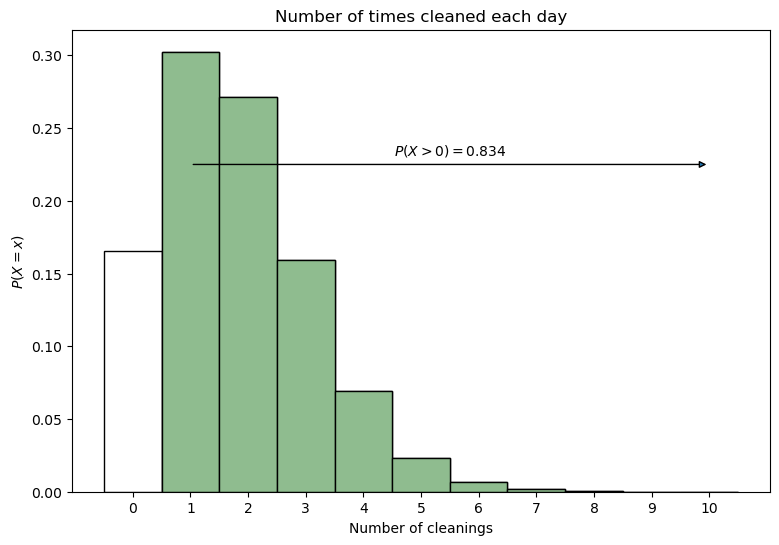

In [124]:
x = np.arange(0, 11)
y = stats.binom(students, p).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cleanings')
plt.title('Number of times cleaned each day')

x1 = np.arange(1, 11)
y1 = stats.binom(students, p).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.binom(students, p).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

##### How likely is it that it goes two days without getting cleaned up? 


In [125]:
two_days = students *2
stats.binom(two_days, p).pmf(0)

0.027483031992576134

In [126]:
#can also use cdf
stats.binom(two_days, p).cdf(0)

0.02748303199257622

##### All week?

In [127]:
five_days = students *5
stats.binom(five_days, p).pmf(0)

0.00012521651388091245

<hr style="border:1.5px solid black">

### #6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
- 1 hour lunch (60 minutes) - 15 mins to eat = 45mins left in my lunch
<br>
- 45mins left in my lunch - 10mins after ordering - 2 mins for me to order = 33 mins to wait
</div>

In [128]:
mean= 15 * 2 # 15 people take 2 minutes each to order
std_dev = 3 * 2

total_lunch_time = 60 #mins
order_time = 2 #mins
eat_time = 15 #mins
cook_time = 10 #mins

max_wait = total_lunch_time - order_time - eat_time - cook_time
max_wait

33

In [129]:
stats.norm(mean, std_dev).cdf(max_wait)

0.6914624612740131

Text(0.5, 0, 'Wait time')

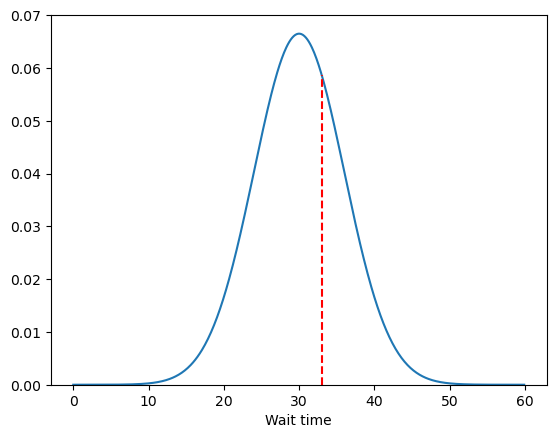

In [130]:
# plot the distibution
x = np.arange(0, 60 , 0.1)
y = stats.norm(mean, std_dev).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0 ,stats.norm(mean, std_dev).pdf(33),  ls = '--', color = 'r')
plt.ylim(0,0.07)
plt.xlabel('Wait time')

<b>Using PEOPLE instead of TIME</b>

<div class="alert alert-block alert-info">
<b>Think about it:</b> 
    <br>
- Solve this problems by considering distribution of people in line instead of converting give mean and std dev to minutes
<br>
- Max time I can be in the line without being late: 60 - 15 - 10 - 2 == 33
<br>
- 33 minutes --> convert here, 33 mins approx equal to 16.5 people
</div>

In [131]:
mean = 15
std_dev = 3

stats.norm(mean, std_dev).cdf(16.5)

0.6914624612740131

<b>Walkthrough using simulation</b>

In [145]:
(np.random.normal(30,6,10_000) < 35).mean()

0.7906

<hr style="border:1.5px solid black">

### #7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.
- a. What percent of employees earn less than 60,000?
- b. What percent of employees earn more than 95,000?
- c. What percent of employees earn between 65,000 and 80,000?
- d. What do the top 5% of employees make?

<div class="alert alert-block alert-info">
<b>IMPORTANT:</b> 
    <br>
    For this exercises, you will need to add your <b>.gitignore</b> as well as your <b>env.py</b> to this repo.
</div>

In [146]:
from pydataset import data
from env import get_connection
from sqlalchemy import create_engine, text

In [147]:
def get_db_url(database):
    return get_connection(database)

In [148]:
url = get_db_url('employees')
query = text('SELECT * FROM salaries where to_date >now()')
engine = create_engine(url)
salaries = pd.read_sql(query, engine.connect())

In [149]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [137]:
#Let's get the mean
mean= salaries.salary.mean()
mean

72012.23585730705

In [138]:
#Let's get the standard deviation
std_dev= salaries.salary.std()
std_dev

17309.99538025198

##### A. What percent of employees earn less than 60,000?

In [139]:
stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

##### B. What percent of employees earn more than 95,000?

In [140]:
stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

##### C. What percent of employees earn between 65,000 and 80,000?

In [141]:
#another way to complete same problem
np.diff(stats.norm(mean, std_dev).cdf([65000,80000]))

array([0.33506057])

##### D. What do the top 5% of employees make?

In [142]:
stats.norm(mean, std_dev).isf(.05)

100484.64454102777

In [143]:
#inversely
stats.norm(mean, std_dev).ppf(.95)

100484.64454102775

<b>Let's visualize this</b>

<Axes: >

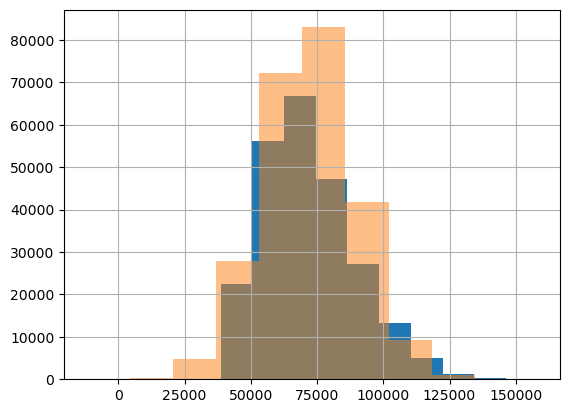

In [144]:
# histogram of actual vs theoretical salary distribution
salaries.salary.hist()
pd.Series(stats.norm(mean, std_dev).rvs(240124)).hist(alpha = 0.5)

<hr style="border:1.5px solid black">